<a href="https://colab.research.google.com/github/AdrienHdz/Webpage_Topic_Clustering/blob/master/03_word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import gensim
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api
from gensim.models import KeyedVectors
from collections import Counter
import operator
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# magic command
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
### Working with google drive
!pip install httplib2==0.15.0
!pip install google-api-python-client==1.6
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

     |████████████████████████████████| 102kB 2.6MB/s 
ERROR: google-api-python-client 1.7.12 has requirement httplib2<1dev,>=0.17.0, but you'll have httplib2 0.15.0 which is incompatible.
  Found existing installation: httplib2 0.17.4
    Uninstalling httplib2-0.17.4:
      Successfully uninstalled httplib2-0.17.4
     |████████████████████████████████| 61kB 1.8MB/s 
ERROR: firebase-admin 4.4.0 has requirement google-api-python-client>=1.7.8, but you'll have google-api-python-client 1.6.0 which is incompatible.
  Found existing installation: google-api-python-client 1.7.12
    Uninstalling google-api-python-client-1.7.12:
      Successfully uninstalled google-api-python-client-1.7.12


In [ ]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### Load data

In [ ]:
link = "https://drive.google.com/file/d/12UDBxkXm-xiWny3_DfVT0QTffpVQf8B6"
fluff, id = link.split('d/')
print (id)
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('text_lemmentized_doctissimo.txt')

12UDBxkXm-xiWny3_DfVT0QTffpVQf8B6


In [ ]:
with open("text_lemmentized_ecocompteur.txt", "rb") as fp:
    text_lemmentized_e = pickle.load(fp)

with open("text_lemmentized_doctissimo.txt", "rb") as fp:
    text_lemmentized_d = pickle.load(fp)

with open("text_lemmentized_woopets.txt", "rb") as fp:
    text_lemmentized_w = pickle.load(fp)

In [ ]:
my_q = 300 
mcount = 10  

# wv = Word2Vec(size = my_q, min_count = mcount)
# wv.build_vocab(text_lemmentized)

In [ ]:
# Download pre-trained word2vec
#googlenews = wget.download("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz")
wv = api.load('word2vec-google-news-300')

[=================================================-] 100.0% 1662.4/1662.8MB downloaded


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
# import spacy.cli
# spacy.cli.download("fr_core_news_md")
# wv_fr = spacy.load('fr_core_news_md')


✘ No compatible model found for 'fr_core_news_lg' (spaCy v2.2.4).



SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
# wv = KeyedVectors.load('word2vec-google-news-300', mmap='r')

In [ ]:
wv['café'].shape

(300,)

In [ ]:
# tokens = wv_fr("dog cat banana afskfsd")

# for token in tokens:
#     print(token.text, token.has_vector, token.vector_norm, token.is_oov)

dog True 10.417899 False
cat True 1.3810264 False
banana True 10.417899 False
afskfsd False 0.0 True


In [ ]:
wv.similar_by_word('inde')

In [ ]:
wv.most_similar(positive = ['chambre'], negative = ['bien'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Piet_Hein_Eek', 0.3445183038711548),
 ('Hairdressing', 0.3282219171524048),
 ('Belleli', 0.326468825340271),
 ('Houria', 0.3111255168914795),
 ('Satchi', 0.309386670589447),
 ('Hoppé', 0.3091997504234314),
 ('Shaun_Leane', 0.3089626431465149),
 ('Supersad', 0.30848008394241333),
 ('Soare', 0.307960569858551),
 ('Sarpaneva', 0.3066573441028595)]

In [ ]:
all_tokens_d = [token for sublist in text_lemmentized_d for token in sublist]
t_counts_d = dict(Counter(all_tokens_d))
print(len(t_counts_d))

all_tokens_w = [token for sublist in text_lemmentized_w for token in sublist]
t_counts_w = dict(Counter(all_tokens_w))
print(len(t_counts_w))

202
181


In [ ]:
n_most_fqt = 200
sorted_t_counts_d = sorted(t_counts_d.items(), key = operator.itemgetter(1), reverse = True)
mft_d = [elt[0] for elt in sorted_t_counts_d[:n_most_fqt]]

n_most_fqt = 200
sorted_t_counts_w = sorted(t_counts_w.items(), key = operator.itemgetter(1), reverse = True)
mft_w = [elt[0] for elt in sorted_t_counts_w[:n_most_fqt]]

In [ ]:
# Filter words from the dictionnary that are not present in word2vec
vector_list_d = [word for word in mft_d if word in wv.vocab]
vector_list_w = [word for word in mft_w if word in wv.vocab]

In [ ]:
mft_vecs_d = np.zeros((n_most_fqt, my_q))
mft_vecs_w = np.zeros((n_most_fqt, my_q))


for idx,token in enumerate(vector_list_d):
  mft_vecs_d[idx,:] = wv[token]
  
for idx,token in enumerate(vector_list_w):
  mft_vecs_w[idx,:] = wv[token]

In [ ]:
len(vector_list_d)

110

<Figure size 1440x720 with 0 Axes>

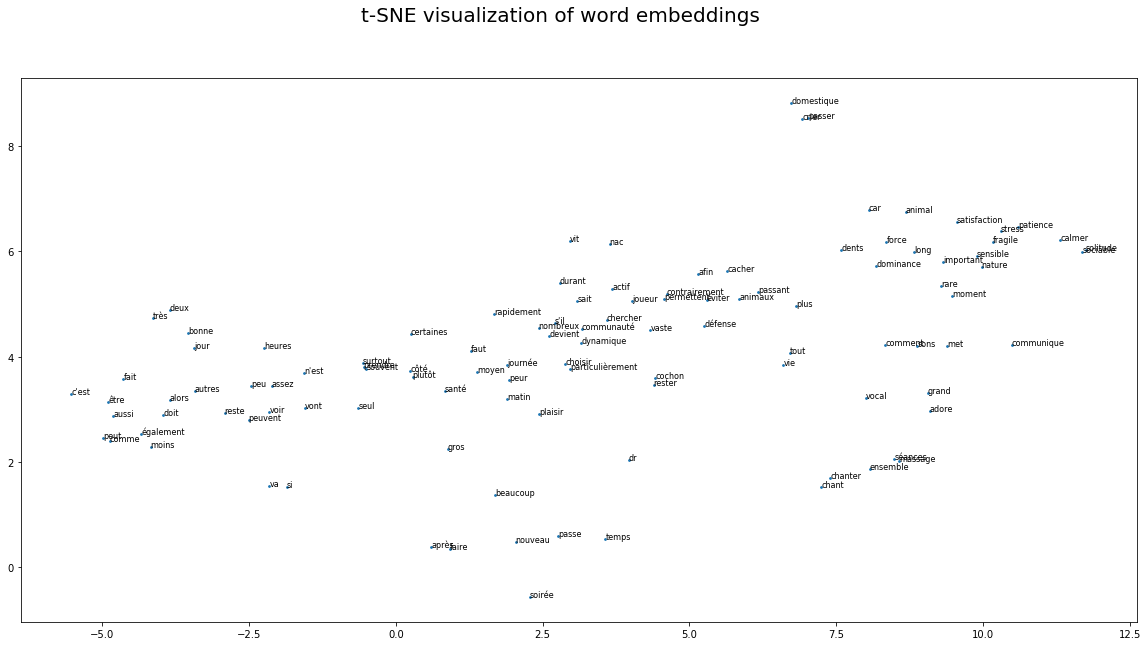

In [ ]:
path_to_plots = ''
my_pca = PCA(n_components=5)
my_tsne = TSNE(n_components=2)

mft_vecs_pca = my_pca.fit_transform(mft_vecs_d[:len(vector_list_d)])
mft_vecs_tsne = my_tsne.fit_transform(mft_vecs_pca)


plt.figure(figsize=(20, 10))
fig, ax = plt.subplots()
ax.scatter(mft_vecs_tsne[:,0], mft_vecs_tsne[:,1],s=3)
for x, y, token in zip(mft_vecs_tsne[:,0] , mft_vecs_tsne[:,1], vector_list_d):     
    ax.annotate(token, xy=(x, y), size=8)
fig.suptitle('t-SNE visualization of word embeddings',fontsize=20)
fig.set_size_inches(20,10)
fig.savefig(path_to_plots + 'word_embeddings.png',dpi=300)
fig.show()

<Figure size 1440x720 with 0 Axes>

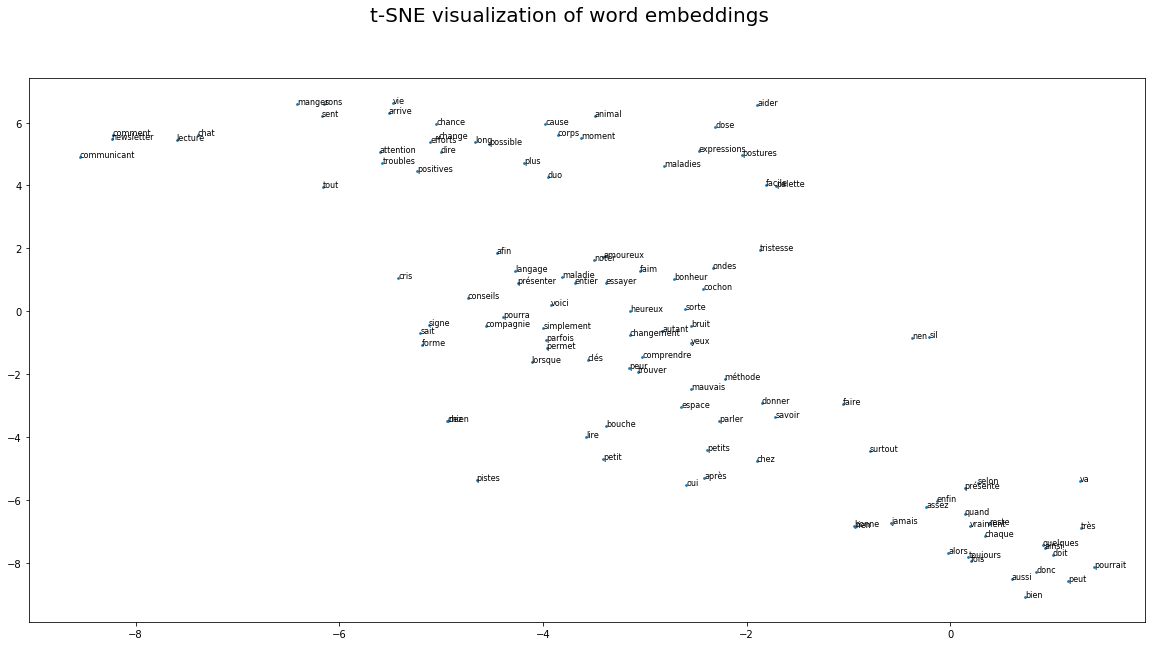

In [ ]:
path_to_plots = ''
my_pca = PCA(n_components=5)
my_tsne = TSNE(n_components=2)

mft_vecs_pca = my_pca.fit_transform(mft_vecs_w[:len(vector_list_w)])
mft_vecs_tsne = my_tsne.fit_transform(mft_vecs_pca)


plt.figure(figsize=(20, 10))
fig, ax = plt.subplots()
ax.scatter(mft_vecs_tsne[:,0], mft_vecs_tsne[:,1],s=3)
for x, y, token in zip(mft_vecs_tsne[:,0] , mft_vecs_tsne[:,1], vector_list_w):     
    ax.annotate(token, xy=(x, y), size=8)
fig.suptitle('t-SNE visualization of word embeddings',fontsize=20)
fig.set_size_inches(20,10)
fig.savefig(path_to_plots + 'word_embeddings.png',dpi=300)
fig.show()

### Document similarities

In [ ]:
stpwds = stopwords.words('english')

In [ ]:
s_1 = 'I look to cook pasta because I really love italian food'
s_2 = 'Italian food is one of the best my favorite meal is pizza'

s_1 = [elt for elt in s_1.split(' ') if elt not in stpwds]
s_2 = [elt for elt in s_2.split(' ') if elt not in stpwds]

print(s_1)
print(s_2)

NameError: ignored

In [ ]:
features = list(set(vector_list_d).union(set(vector_list_w)))

# project the two sentences in the vector space
p_1 = [1 if feature in vector_list_d else 0 for feature in features]
p_2 = [1 if feature in vector_list_w else 0 for feature in features]

p_1_print = list(zip(features, p_1))
p_2_print = list(zip(features, p_2))

print('=== vector space representation of sentence 1 : ===')
print(p_1_print, '\n')
print('=== vector space representation of sentence 2 : ===')
print(p_2_print, '\n')

print('similarity of sentences 1 and 2 in vector space:', 
      cosine_similarity(np.array(p_1).reshape(1,-1),np.array(p_2).reshape(1,-1)))

=== vector space representation of sentence 1 : ===
[('séances', 1), ('essayer', 0), ('changement', 0), ('change', 0), ('fois', 0), ('bonne', 1), ('amoureux', 0), ('actif', 1), ('duo', 0), ('peut', 1), ('durant', 1), ('très', 1), ('sait', 1), ('bonheur', 0), ('force', 1), ('contrairement', 1), ('si', 1), ('pistes', 0), ('sociable', 1), ('maladie', 0), ('plus', 1), ('donc', 0), ('troubles', 0), ('manger', 0), ('jour', 1), ('petits', 0), ('domestique', 1), ('nouveau', 1), ('cris', 0), ("s'il", 1), ('palette', 0), ('corps', 0), ('massage', 1), ('vont', 1), ('entier', 0), ('patience', 1), ('deux', 1), ('cacher', 1), ('lorsque', 0), ('sons', 1), ('tout', 1), ('aider', 0), ('bruit', 0), ('nature', 1), ('doit', 1), ('beaucoup', 1), ('dynamique', 1), ('selon', 0), ('moyen', 1), ('postures', 0), ('cause', 0), ('jamais', 0), ('peur', 1), ('enfin', 0), ('plutôt', 1), ('pourra', 0), ('reste', 1), ('devient', 1), ('toujours', 0), ('également', 1), ('prendre', 1), ('éviter', 1), ('vit', 1), ('adore'

In [ ]:
p_1_embeddings = np.concatenate([wv[token].reshape(1,-1) for token in vector_list_d])
p_2_embeddings = np.concatenate([wv[token].reshape(1,-1) for token in vector_list_w])

# naive approach: centroids
centroid_1 = np.mean(p_1_embeddings, axis=0).reshape(1,-1)
centroid_2 = np.mean(p_2_embeddings, axis=0).reshape(1,-1)

print('similarity of centroids of sentences 1 and 2 in word embeddings space:', cosine_similarity(centroid_1, centroid_2))